# Objective: Develop a machine learning model to estimate restaurant aggregate ratings using various features

### 1.0 Data Preparation

- Address any missing or incomplete values.
- Convert categorical variables into numerical representations.
- Divide the dataset into training and testing subsets

In [21]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import mlflow
import mlflow.sklearn

import warnings
warnings.filterwarnings("ignore")

#### 1.1 Load and Explore the data

In [7]:
# Load dataset
df = pd.read_csv("Dataset.csv")

In [8]:
# Sample the data to see what it looks like
df.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4549,300910,Shiv Tikki Wala,1,New Delhi,"Ground Floor, Pramesh Tower, Karkardooma Commu...",Karkardooma,"Karkardooma, New Delhi",77.302308,28.649227,"Street Food, North Indian",...,Indian Rupees(Rs.),No,No,No,No,1,3.8,Yellow,Good,300
6161,18449949,Roll Junction,1,New Delhi,"F 205 & 206, Near Akshardham Temple, Pandav Na...",Pandav Nagar,"Pandav Nagar, New Delhi",0.000000,0.000000,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0


In [9]:
# Check the column names
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
# Check for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [39]:
# Check for the duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# Check for data types fot the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
# Check the descriptive stats of the numerical part of the data.
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#### 1.2 Prepare the data for modelling

In [13]:
categorical_features = ["City", "Currency", "Has Online delivery", "Has Table booking", "Is delivering now", "Switch to order menu"]
numeric_features = ["Votes", "Longitude", "Latitude", "Average Cost for two", "Country Code", "Price range"]


# Perform feature selection
X = df[categorical_features + numeric_features]
y = df["Aggregate rating"]

#### 1.3 Convert categorical variables into numerical representations.

In [14]:
# Import the needed libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [15]:
# One-hot encoding of categorical variables
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

#### 1.4 Setup MLflow for model tracking and comparison

In [22]:
# Set MLflow experiment name
mlflow.set_experiment("Restaurant Ratings Prediction")

<Experiment: artifact_location='file:///C:/Users/David%20Ahonsu/Downloads/Utiva%202024/Virtual%20Internship/restuarant_rating_ml/restuarant_models/mlruns/297881625490618785', creation_time=1756588980913, experiment_id='297881625490618785', last_update_time=1756588980913, lifecycle_stage='active', name='Restaurant Ratings Prediction', tags={}>

#### 1.5 Divide the dataset into training and testing subsets.

In [24]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 2.0  Model Training and Evaluation:

 - Apply a regression algorithm (e.g., linear regression or decision tree regressor).
 - Assess model performance using appropriate evaluation metrics

- There are three Regression algorithms/models to be trained/run, and evaluated.
- The algorithms/models to be trained/run are:
  - "Decision Tree Regressor",
  - "Linear Regressor" and
  - "Random Forest Regressor".
- The metrics of the three models will be compared.
- The model with the best metrics will be selected as the best model.

#### 2.1 Autolog, train and evaluate the models

In [19]:
# Enable MLflow autologging
mlflow.sklearn.autolog(log_models = True)

##### 2.1.1 Train and evaluate the Decision Tree Regressor

In [25]:
# Start MLflow run for the "Decision Tree Regressor".
with mlflow.start_run(run_name='Decision Tree Regressor'):
    
    # Train the Decision Tree Regressor model.
  
    dt_pipeline = Pipeline(steps = [
        ("preprocessor", preprocessor),
        ("model", DecisionTreeRegressor(random_state = 42))
    ])

    dt_pipeline.fit(X_train, y_train)


    # Use model for Prediction
    dt_predictions = dt_pipeline.predict(X_test)


    # Get the model metrics
    mae = mean_absolute_error(y_test, dt_predictions)
    r2 = r2_score(y_test, dt_predictions)


    # Log metrics manually as well.
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)


    print("Decision Tree Regressor model trained and logged")
    print(f"Decision Tree Regressor MAE: {mae:.3f}, Decision Tree Regressor R2: {r2:.3f}")

Decision Tree Regressor model trained and logged
Decision Tree Regressor MAE: 0.286, Decision Tree Regressor R2: 0.913


##### 2.1.2 Train and evaluate the Linear Regressor

In [26]:
# Import the necessary libraries.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Initialise and train a Linear Regressor
with mlflow.start_run(run_name = 'Linear Regressor'):
    
    # Train model   
    lr_pipeline = Pipeline(steps = [
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ])

    lr_pipeline.fit(X_train, y_train)


    # Use model for Prediction
    lr_predictions = lr_pipeline.predict(X_test)


    # Get the metrics
    lr_mae = mean_absolute_error(y_test, lr_predictions)
    lr_r2 = r2_score(y_test, lr_predictions)


    # Log metrics manually as well
    mlflow.log_metric("MAE", lr_mae)
    mlflow.log_metric("R2", lr_r2)


    print("Linear Regression Model trained and logged")
    print(f"Linear Regression MAE: {lr_mae:.3f}, Linear Regression R2: {lr_r2:.3f}")


Linear Regression Model trained and logged
Linear Regression MAE: 1.009, Linear Regression R2: 0.343


##### 2.1.3 Train and evaluate the Random Forest Regressor

In [28]:
# Initialise and train Random Forest Regressor.
with mlflow.start_run(run_name = 'Random Forest Regressor'):
    
    # Train model   
    rf_pipeline = Pipeline(steps = [
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators = 100, random_state = 42))
    ])

    rf_pipeline.fit(X_train, y_train)


    # Use model for Prediction
    rf_predictions = rf_pipeline.predict(X_test)


    # Get the metrics
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_r2 = r2_score(y_test, rf_predictions)


    # Log metrics manually as well
    mlflow.log_metric("MAE", rf_mae)
    mlflow.log_metric("R2", rf_r2)


    print("Random Forest Regression Model trained and logged")
    print(f"Random Forest Regressor MAE: {rf_mae:.3f}, Random Forest Regressor R2: {rf_r2:.3f}")



Random Forest Regression Model trained and logged
Random Forest Regressor MAE: 0.202, Random Forest Regressor R2: 0.958


##### 3.1.4 Initialise and train Hypertuned Random Forest Regressor.

In [29]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV

In [30]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# State the hyperparameters to be tuned
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}


grid_search = GridSearchCV(pipeline, param_grid, cv = 3, scoring = "r2", n_jobs = -1, verbose = 2)


with mlflow.start_run(run_name = "Hypertuned Random Forest Regressor"):
    grid_search.fit(X_train, y_train)


    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    mlflow.log_param("best_params", grid_search.best_params_)
    mlflow.log_metric("Best_CV_R2", grid_search.best_score_)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)


    mlflow.sklearn.log_model(best_pipeline, "Best RandomForest")



    print("Random Forest Regressor tuned and logged")
    print("Best Params:", grid_search.best_params_)
    print(f"Best CV R²: {grid_search.best_score_:.3f}")
    print(f"MAE: {mae:.3f}, R2: {r2:.3f}")
        

Fitting 3 folds for each of 24 candidates, totalling 72 fits


2025/09/20 11:21:26 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.
2025/09/20 11:21:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/20 11:21:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Regressor tuned and logged
Best Params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV R²: 0.956
MAE: 0.200, R2: 0.959


 ### 3.0 Insights and Feature Impact:
 

- Interpret the model outputs.
- Identify and examine the most significant features influencing the rating predictions

#### 3.1 Models output interpretation

#### 3.1.1 Model Accuracy & Error

##### Mean Absolute Error(MAE) measures the average prediction error.

- The tuned Random Forest Regressor has an MAE of 0.20.

- This means predictions are usually within 0.2 points of the true restaurant rating.

- That’s very accurate considering a 1–5 rating scale.

- The Coefficient of Determination (R2) measures how much of the variance is explained.

- With R2 = 0.959, the tuned Random Forest Regressor explains 96% of the variation in restaurant ratings.

- This indicates the model is highly predictive and captures key patterns in the data.

#### 3.1.2 Model Comparison

##### Linear Regression performed poorly (R2 = 0.336, MAE ≈ 1).

- Suggests that restaurant ratings are not linearly related to the features.

- Confirms the importance of non-linear models.

  
##### Decision Tree was decent (R2 = 0.911, MAE ≈ 0.289).

- Captured important relationships, but single trees are prone to overfitting.


##### Random Forest Regressors(default and tuned) clearly outperformed both.

- Ensemble learning reduces overfitting.

- Tuning improved stability and ensured generalisation across different splits of the data.

#### 3.1.3 Practical Meaning

- The tuned Random Forest is reliable enough for practical use, for example, predicting how well a new restaurant might be rated.

- It can serve as a decision-support tool for:

    - Restaurant owners: to understand which factors improve ratings.

    - Food platforms: to estimate ratings for new/unrated restaurants.

    - Market analysts: to study patterns in consumer preferences.

#### 3.1.4 Limitations



- Ratings may depend on intangibles (service quality, trends, social media influence) that are not fully captured in the dataset.

- Cross-validation (which was done in tuning) suggests the model generalises well, but testing on completely new or unseen data would be the ultimate test.

#### 3.1.5 In summary:
- The tuned Random Forest model is extremely strong. 
- It predicts restaurant ratings with high accuracy.
- It explains almost all the variability and captures the complex, non-linear relationships that the Linear model missed.

#### 3.1.6 Identify and examine the most significant features influencing the rating predictions

In [31]:
%%capture
!pip install seaborn

In [32]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Access the RandomForest model inside the pipeline
rf_model = best_pipeline.named_steps["model"]

# Extract feature importances
importances = rf_model.feature_importances_

In [34]:
# Get categorical feature names from the one-hot encoder
ohe = best_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(["City", "Currency", "Has Online delivery", "Has Table booking", "Is delivering now", "Switch to order menu"])


# Numeric features
num_feature_names = ["Votes", "Longitude", "Latitude", "Average Cost for two", "Country Code", "Price range"]


# Combine
all_feature_names = list(cat_feature_names) + num_feature_names


# Match importances
feature_importances = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by = "Importance", ascending = False)

In [35]:
print("Top Features Driving Predictions:")
feature_importances.head(5)

Top Features Driving Predictions:


,Feature,Importance
146,Votes,0.973474
147,Longitude,0.010053
148,Latitude,0.006881
149,Average Cost for two,0.003487
150,Country Code,0.002731


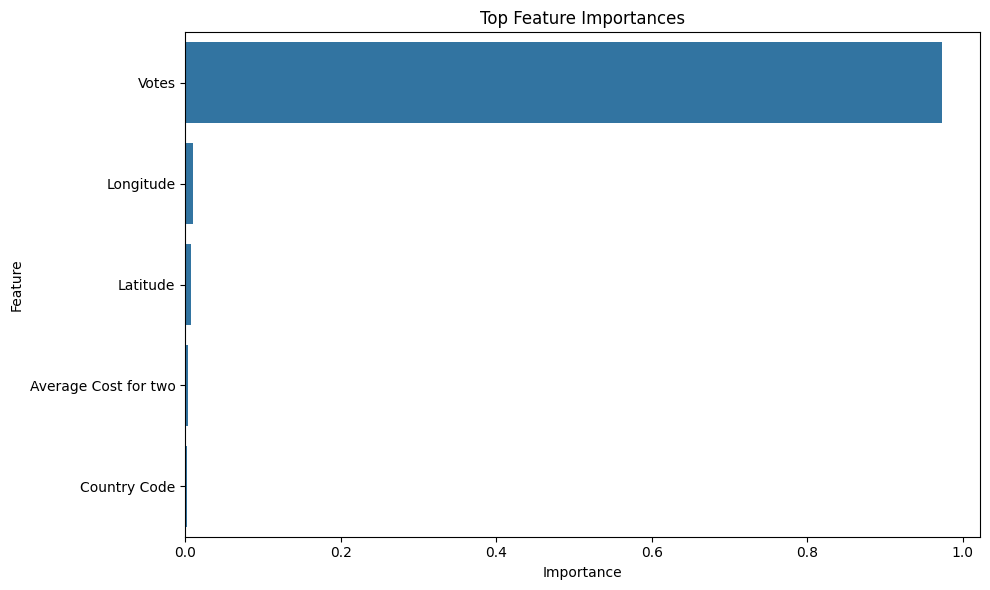

In [36]:
# Plot feature importance
plt.figure(figsize = (10, 6))
sns.barplot(
    x = "Importance",
    y = "Feature",
    data = feature_importances.head(5)
)

plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()

#### Key Takeaway

- Votes dominate completely, almost the only feature driving predictions with 97% importance.

- Location (longitude/latitude), cost, and country are secondary factors.

- Service features (online delivery, table booking) have minimal impact on ratings.


#### In other words:

- Customers’ collective voting behaviour is what drives the model’s predictions the most, with other factors playing only a minor supporting role.

### 4.0 Create an End Point to Test the Model

In [36]:
# Import the necessary library
import subprocess as sp
import requests
import json

In [50]:
# Define model name and version from the MLflow registry
model_name = "RestaurantRatingModel"
model_version = 1


# Command to serve the model
command = [
    "mlflow", "models", "serve",
    "-m", f"models:/{model_name}/{model_version}",
    "-p", "5001",
    "--no-conda"
]


# Start the server
process = sp.Popen(command)


print(f"Now serving {model_name} version {model_version} at http://127.0.0.1:5001/invocations")

Now serving RestaurantRatingModel version 1 at http://127.0.0.1:5001/invocations


In [51]:
# API endpoint
url = "http://127.0.0.1:5001/invocations"

In [62]:
# Sample input - this must match the training schema.
sample = pd.DataFrame([{
    "Votes": 400,
    "Longitude": 77.23,
    "Latitude": 28.61,
    "Average Cost for two": 800,
    "Country Code": 1,
    "Price range": 2,
    "City": "New Delhi",
    "Currency": "Indian Rupees(Rs.)",
    "Has Online delivery": "Yes",
    "Has Table booking": "No",
    "Is delivering now": "No",
    "Switch to order menu": "No"
}])


# Correct payload: wrap in dict with "dataframe_records"
payload = {"dataframe_records": sample.to_dict(orient="records")}


headers = {"Content-Type": "application/json"}
response = requests.post(url, headers=headers, json=payload)

In [63]:
print("Status:", response.status_code)
print("Prediction:", response.json())

Status: 200
Prediction: {'predictions': [3.7352012458205377]}


In [125]:
process.terminate()